In [19]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf

lung_deaths = pd.read_csv('ldeaths.csv')

lung_deaths.index = pd.date_range('01-01-1974', periods=lung_deaths.shape[0], freq='M')
lung_deaths

,x
1974-01-31,3035
1974-02-28,2552
1974-03-31,2704
1974-04-30,2554
1974-05-31,2014
...,...
1979-08-31,1354
1979-09-30,1333
1979-10-31,1492
1979-11-30,1781


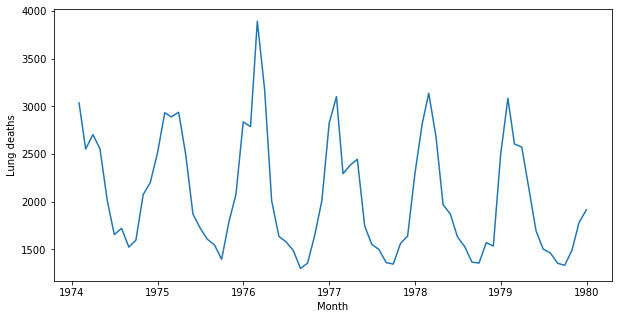

In [4]:
plt.figure(figsize=([10,5]))
plt.plot(lung_deaths)
plt.xlabel('Month')
plt.ylabel('Lung deaths')
plt.show()

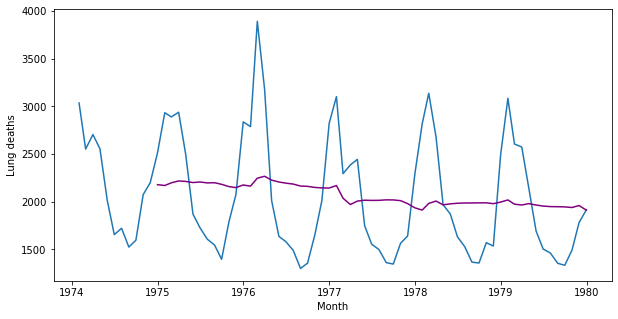

In [10]:
# Rolling average
plt.figure(figsize=([10,5]))
plt.plot(lung_deaths)
plt.xlabel('Month')
plt.ylabel('Lung deaths')
plt.plot(lung_deaths.rolling(12).mean(), c='purple')
plt.show()

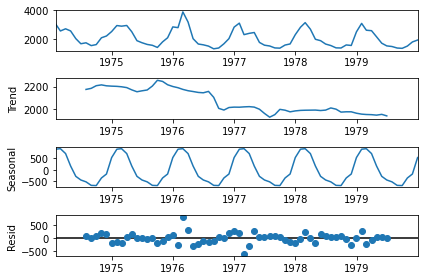

In [12]:
# Seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(lung_deaths, period=12)
decomp.plot()
plt.show()

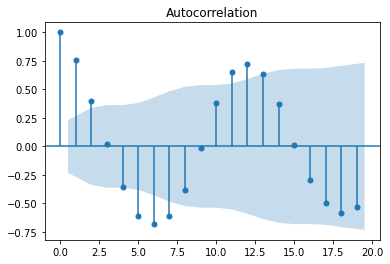

In [13]:
# Autocorrelation function

plot_acf(lung_deaths)
plt.show()

In [14]:
train_size = int(len(lung_deaths)*0.8)

In [15]:
train = lung_deaths.iloc[:train_size]
test = lung_deaths.iloc[train_size:]

In [31]:
model = SARIMAX(train, order=(1,0,1), seasonal_order=(1,0,1,12))

In [32]:
res = model.fit()
#print(res.summary())

In [33]:
prediction = res.predict(start=test.index[0], end=test.index[-1])

<AxesSubplot:>

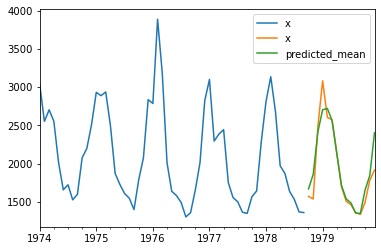

In [34]:
pd.concat([train, test, prediction], axis=1).plot()